In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('code').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/18 02:13:54 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
df = spark.read.csv('hr_org_all.csv', inferSchema=True, header=True)
df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- ProjectsCompleted: integer (nullable = true)
 |-- Productivity(%): integer (nullable = true)
 |-- SatisfactionRate(%): integer (nullable = true)
 |-- FeedbackScore: double (nullable = true)
 |-- Department: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- JoiningDate: string (nullable = true)
 |-- Salary: integer (nullable = true)



In [3]:
df.show()

+------------------+---+------+-----------------+---------------+-------------------+-------------+----------+----------------+-----------+------+
|              Name|Age|Gender|ProjectsCompleted|Productivity(%)|SatisfactionRate(%)|FeedbackScore|Department|        Position|JoiningDate|Salary|
+------------------+---+------+-----------------+---------------+-------------------+-------------+----------+----------------+-----------+------+
|   Douglas Lindsey| 25|  Male|               11|             57|                 25|          4.7| Marketing|         Analyst|     Jan-20| 63596|
|  Anthony Roberson| 59|Female|               19|             55|                 76|          2.8|        IT|         Manager|     Jan-99|112540|
|     Thomas Miller| 30|  Male|                8|             87|                 10|          2.4|        IT|         Analyst|     Jan-17| 66292|
|      Joshua Lewis| 26|Female|                1|             53|                  4|          1.4| Marketing|        

In [4]:
df.columns

['Name',
 'Age',
 'Gender',
 'ProjectsCompleted',
 'Productivity(%)',
 'SatisfactionRate(%)',
 'FeedbackScore',
 'Department',
 'Position',
 'JoiningDate',
 'Salary']

In [5]:
df.describe().show()

+-------+-------------+----------------+------+-----------------+------------------+-------------------+-----------------+----------+---------+-----------+------------------+
|summary|         Name|             Age|Gender|ProjectsCompleted|   Productivity(%)|SatisfactionRate(%)|    FeedbackScore|Department| Position|JoiningDate|            Salary|
+-------+-------------+----------------+------+-----------------+------------------+-------------------+-----------------+----------+---------+-----------+------------------+
|  count|          200|             200|   200|              200|               200|                200|              200|       200|      200|        200|               200|
|   mean|         null|           34.65|  null|           11.455|            46.755|             49.935|2.883000000000001|      null|     null|       null|         76619.245|
| stddev|         null|9.79731785673659|  null|6.408848703826821|28.530068331410902|  28.93435257257314|1.123262924693035|   

In [6]:
df = spark.read.csv('hr_org.csv', inferSchema=True, header=True)
df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- ProjectsCompleted: integer (nullable = true)
 |-- Productivity(%): integer (nullable = true)
 |-- SatisfactionRate(%): integer (nullable = true)
 |-- FeedbackScore: double (nullable = true)
 |-- Department: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- JoiningDate: string (nullable = true)



In [7]:
df.show()

+------------------+---+------+-----------------+---------------+-------------------+-------------+----------+----------------+-----------+
|              Name|Age|Gender|ProjectsCompleted|Productivity(%)|SatisfactionRate(%)|FeedbackScore|Department|        Position|JoiningDate|
+------------------+---+------+-----------------+---------------+-------------------+-------------+----------+----------------+-----------+
|   Douglas Lindsey| 25|  Male|               11|             57|                 25|          4.7| Marketing|         Analyst|     20-Jan|
|  Anthony Roberson| 59|Female|               79|             55|                 76|          2.8|        IT|         Manager|     Jan-99|
|     Thomas Miller| 30|  Male|                8|             87|                 10|          2.4|        IT|         Analyst|     17-Jan|
|      Joshua Lewis| 26|Female|                1|             53|                  4|          1.4| Marketing|          Intern|     22-Jan|
|  Stephanie Bailey|

In [8]:
df.head(1)

[Row(Name='Douglas Lindsey', Age=25, Gender='Male', ProjectsCompleted=11, Productivity(%)=57, SatisfactionRate(%)=25, FeedbackScore=4.7, Department='Marketing', Position='Analyst', JoiningDate='20-Jan')]

In [9]:
df.columns

['Name',
 'Age',
 'Gender',
 'ProjectsCompleted',
 'Productivity(%)',
 'SatisfactionRate(%)',
 'FeedbackScore',
 'Department',
 'Position',
 'JoiningDate']

In [10]:
df.describe('Gender').show()

+-------+------+
|summary|Gender|
+-------+------+
|  count|   200|
|   mean|  null|
| stddev|  null|
|    min|Female|
|    max|  Male|
+-------+------+



In [11]:
df.describe('ProjectsCompleted').show()

+-------+------------------+
|summary| ProjectsCompleted|
+-------+------------------+
|  count|               200|
|   mean|            14.095|
| stddev|18.827328981640346|
|    min|                 0|
|    max|               200|
+-------+------------------+



In [12]:
df.describe('SatisfactionRate(%)').show()

+-------+-------------------+
|summary|SatisfactionRate(%)|
+-------+-------------------+
|  count|                200|
|   mean|             49.935|
| stddev|  28.93435257257314|
|    min|                  0|
|    max|                100|
+-------+-------------------+



In [13]:
df.describe().show()

+-------+-------------+----------------+------+------------------+------------------+-------------------+-----------------+----------+---------+-----------+
|summary|         Name|             Age|Gender| ProjectsCompleted|   Productivity(%)|SatisfactionRate(%)|    FeedbackScore|Department| Position|JoiningDate|
+-------+-------------+----------------+------+------------------+------------------+-------------------+-----------------+----------+---------+-----------+
|  count|          200|             200|   200|               200|               200|                200|              198|       200|      200|        200|
|   mean|         null|           34.65|  null|            14.095|            46.755|             49.935| 2.89949494949495|      null|     null|       null|
| stddev|         null|9.79731785673659|  null|18.827328981640346|28.530068331410902|  28.93435257257314|1.116761883319482|      null|     null|       null|
|    min|Adrian Walker|              22|Female|           

In [14]:
df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- ProjectsCompleted: integer (nullable = true)
 |-- Productivity(%): integer (nullable = true)
 |-- SatisfactionRate(%): integer (nullable = true)
 |-- FeedbackScore: double (nullable = true)
 |-- Department: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- JoiningDate: string (nullable = true)



In [15]:
from pyspark.sql.types import (StructField,StringType,IntegerType,StructType, FloatType)

In [16]:
data_schema = [
              StructField('Name',IntegerType(),True),
              StructField('Age',StringType(),True),
              StructField('Gender',StringType(),True),
              StructField('Projects Completed',IntegerType(),True),
              StructField('Productivity (%)',IntegerType(),True),
              StructField('Satisfaction Rate (%)',IntegerType(),True),
              StructField('Feedback Score',FloatType(),True),
              StructField('Department',StringType(),True),
              StructField('Position',StringType(),True),
              StructField('Joining Date',StringType(),True)]
             
final_struct = StructType(fields=data_schema)

In [17]:
df = spark.read.csv('hr_org.csv', schema=final_struct)

df.printSchema()

root
 |-- Name: integer (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Projects Completed: integer (nullable = true)
 |-- Productivity (%): integer (nullable = true)
 |-- Satisfaction Rate (%): integer (nullable = true)
 |-- Feedback Score: float (nullable = true)
 |-- Department: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- Joining Date: string (nullable = true)



In [18]:
df = spark.read.csv('hr_org.csv', inferSchema=True, header=True)
df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- ProjectsCompleted: integer (nullable = true)
 |-- Productivity(%): integer (nullable = true)
 |-- SatisfactionRate(%): integer (nullable = true)
 |-- FeedbackScore: double (nullable = true)
 |-- Department: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- JoiningDate: string (nullable = true)



In [19]:
df.show()

+------------------+---+------+-----------------+---------------+-------------------+-------------+----------+----------------+-----------+
|              Name|Age|Gender|ProjectsCompleted|Productivity(%)|SatisfactionRate(%)|FeedbackScore|Department|        Position|JoiningDate|
+------------------+---+------+-----------------+---------------+-------------------+-------------+----------+----------------+-----------+
|   Douglas Lindsey| 25|  Male|               11|             57|                 25|          4.7| Marketing|         Analyst|     20-Jan|
|  Anthony Roberson| 59|Female|               79|             55|                 76|          2.8|        IT|         Manager|     Jan-99|
|     Thomas Miller| 30|  Male|                8|             87|                 10|          2.4|        IT|         Analyst|     17-Jan|
|      Joshua Lewis| 26|Female|                1|             53|                  4|          1.4| Marketing|          Intern|     22-Jan|
|  Stephanie Bailey|

In [20]:
df.select('ProjectsCompleted').show()

+-----------------+
|ProjectsCompleted|
+-----------------+
|               11|
|               79|
|                8|
|                1|
|               14|
|                5|
|               13|
|                4|
|                7|
|               17|
|               11|
|               19|
|              200|
|               14|
|               18|
|               17|
|               15|
|               13|
|               12|
|                2|
+-----------------+
only showing top 20 rows



In [21]:
df.withColumnRenamed('Productivity(%)', 'Productivity').show()

+------------------+---+------+-----------------+------------+-------------------+-------------+----------+----------------+-----------+
|              Name|Age|Gender|ProjectsCompleted|Productivity|SatisfactionRate(%)|FeedbackScore|Department|        Position|JoiningDate|
+------------------+---+------+-----------------+------------+-------------------+-------------+----------+----------------+-----------+
|   Douglas Lindsey| 25|  Male|               11|          57|                 25|          4.7| Marketing|         Analyst|     20-Jan|
|  Anthony Roberson| 59|Female|               79|          55|                 76|          2.8|        IT|         Manager|     Jan-99|
|     Thomas Miller| 30|  Male|                8|          87|                 10|          2.4|        IT|         Analyst|     17-Jan|
|      Joshua Lewis| 26|Female|                1|          53|                  4|          1.4| Marketing|          Intern|     22-Jan|
|  Stephanie Bailey| 43|  Male|          

In [22]:
df.createOrReplaceTempView('hr')

results = spark.sql("SELECT * FROM hr")

In [23]:
results = spark.sql("SELECT Age FROM hr WHERE Age >= 50")
results.show()

+---+
|Age|
+---+
| 59|
| 58|
| 58|
| 51|
| 57|
| 57|
| 59|
| 51|
| 50|
| 54|
| 50|
| 55|
| 57|
| 51|
| 50|
| 51|
| 54|
| 54|
| 58|
| 60|
+---+



# Merge

In [24]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("MergeData").getOrCreate()

In [25]:
df2 = spark.read.csv("hr_org.csv", header=True, inferSchema=True)
df2.show()

+------------------+---+------+-----------------+---------------+-------------------+-------------+----------+----------------+-----------+
|              Name|Age|Gender|ProjectsCompleted|Productivity(%)|SatisfactionRate(%)|FeedbackScore|Department|        Position|JoiningDate|
+------------------+---+------+-----------------+---------------+-------------------+-------------+----------+----------------+-----------+
|   Douglas Lindsey| 25|  Male|               11|             57|                 25|          4.7| Marketing|         Analyst|     20-Jan|
|  Anthony Roberson| 59|Female|               79|             55|                 76|          2.8|        IT|         Manager|     Jan-99|
|     Thomas Miller| 30|  Male|                8|             87|                 10|          2.4|        IT|         Analyst|     17-Jan|
|      Joshua Lewis| 26|Female|                1|             53|                  4|          1.4| Marketing|          Intern|     22-Jan|
|  Stephanie Bailey|

In [26]:
df3 = spark.read.csv("hr_1.csv", header=True, inferSchema=True)
df3.show()

+------------------+------+
|              Name|Salary|
+------------------+------+
|   Douglas Lindsey| 63596|
|  Anthony Roberson|112540|
|     Thomas Miller| 66292|
|      Joshua Lewis| 38303|
|  Stephanie Bailey|101133|
|     Jonathan King| 48740|
|     Kyle Figueroa| 73502|
|     Shannon Allen| 39670|
|       Daryl Noble| 49323|
|    Tracy Figueroa| 92915|
|      Eric Sanders| 80721|
|     Joshua Nelson| 95072|
|      Donald Davis| 35169|
|  Ms. Emily Dawson| 70271|
|      Angela Davis| 89571|
|    Melissa Galvan|118466|
|        Erin Smith|105893|
|   James Hernandez| 92074|
|      Amanda White|107279|
|Michael Morton DDS| 37855|
+------------------+------+
only showing top 20 rows



In [27]:
merged_df = df2.join(df3, on="Name", how="inner")

merged_df.show()

+------------------+---+------+-----------------+---------------+-------------------+-------------+----------+----------------+-----------+------+
|              Name|Age|Gender|ProjectsCompleted|Productivity(%)|SatisfactionRate(%)|FeedbackScore|Department|        Position|JoiningDate|Salary|
+------------------+---+------+-----------------+---------------+-------------------+-------------+----------+----------------+-----------+------+
|   Douglas Lindsey| 25|  Male|               11|             57|                 25|          4.7| Marketing|         Analyst|     20-Jan| 63596|
|  Anthony Roberson| 59|Female|               79|             55|                 76|          2.8|        IT|         Manager|     Jan-99|112540|
|     Thomas Miller| 30|  Male|                8|             87|                 10|          2.4|        IT|         Analyst|     17-Jan| 66292|
|      Joshua Lewis| 26|Female|                1|             53|                  4|          1.4| Marketing|        

# Delete columns

In [28]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("ColumnSelection").getOrCreate()

In [29]:
df = spark.read.csv("hr_org_all.csv", header=True, inferSchema=True)

selected_columns = ["Name", "Age", "Gender",
                   "ProjectsCompleted","Productivity(%)","SatisfactionRate(%)",
                   "FeedbackScore","JoiningDate","Salary"]

new_df = df.select(selected_columns)
new_df.write.csv("output.csv", header=True, mode="overwrite")
spark.stop()

In [30]:
new_df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- ProjectsCompleted: integer (nullable = true)
 |-- Productivity(%): integer (nullable = true)
 |-- SatisfactionRate(%): integer (nullable = true)
 |-- FeedbackScore: double (nullable = true)
 |-- JoiningDate: string (nullable = true)
 |-- Salary: integer (nullable = true)



# Operations and Aggregation

In [96]:
df = spark.read.csv('hr_org.csv', inferSchema=True, header=True)
df.printSchema()
df.show()

root
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- ProjectsCompleted: integer (nullable = true)
 |-- Productivity(%): integer (nullable = true)
 |-- SatisfactionRate(%): integer (nullable = true)
 |-- FeedbackScore: double (nullable = true)
 |-- Department: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- JoiningDate: string (nullable = true)

+------------------+---+------+-----------------+---------------+-------------------+-------------+----------+----------------+-----------+
|              Name|Age|Gender|ProjectsCompleted|Productivity(%)|SatisfactionRate(%)|FeedbackScore|Department|        Position|JoiningDate|
+------------------+---+------+-----------------+---------------+-------------------+-------------+----------+----------------+-----------+
|   Douglas Lindsey| 25|  Male|               11|             57|                 25|          4.7| Marketing|         Analyst|     20-Jan|
|  A

In [97]:
df.head(1)

[Row(Name='Douglas Lindsey', Age=25, Gender='Male', ProjectsCompleted=11, Productivity(%)=57, SatisfactionRate(%)=25, FeedbackScore=4.7, Department='Marketing', Position='Analyst', JoiningDate='20-Jan')]

In [98]:
df.filter("ProjectsCompleted < 5 ").select('ProjectsCompleted','SatisfactionRate(%)').show()

+-----------------+-------------------+
|ProjectsCompleted|SatisfactionRate(%)|
+-----------------+-------------------+
|                1|                  4|
|                4|                 68|
|                2|                 17|
|                4|                 66|
|                3|                 26|
|                3|                 99|
|                3|                 35|
|                3|                 85|
|                2|                 45|
|                4|                 56|
|                2|                 95|
|                0|                 60|
|                1|                 14|
|                0|                  0|
|                3|                 89|
|                1|                 42|
|                4|                 49|
|                3|                 82|
|                1|                 16|
|                1|                 93|
+-----------------+-------------------+
only showing top 20 rows



In [99]:
df.filter(df['ProjectsCompleted'] < 5).select('ProjectsCompleted','SatisfactionRate(%)').show()

+-----------------+-------------------+
|ProjectsCompleted|SatisfactionRate(%)|
+-----------------+-------------------+
|                1|                  4|
|                4|                 68|
|                2|                 17|
|                4|                 66|
|                3|                 26|
|                3|                 99|
|                3|                 35|
|                3|                 85|
|                2|                 45|
|                4|                 56|
|                2|                 95|
|                0|                 60|
|                1|                 14|
|                0|                  0|
|                3|                 89|
|                1|                 42|
|                4|                 49|
|                3|                 82|
|                1|                 16|
|                1|                 93|
+-----------------+-------------------+
only showing top 20 rows



In [100]:
df.filter( (df['ProjectsCompleted'] > 10) & (df['SatisfactionRate(%)'] < 50) ).select('ProjectsCompleted','SatisfactionRate(%)').show()

+-----------------+-------------------+
|ProjectsCompleted|SatisfactionRate(%)|
+-----------------+-------------------+
|               11|                 25|
|               14|                  9|
|               13|                 39|
|               17|                 15|
|               19|                 31|
|               14|                 20|
|               18|                  8|
|               15|                 37|
|               13|                 36|
|               13|                 37|
|               14|                 47|
|               11|                 17|
|               15|                 20|
|               11|                 15|
|               11|                 38|
|               13|                 27|
|               16|                 38|
|               17|                 18|
|               16|                  6|
|               20|                 45|
+-----------------+-------------------+
only showing top 20 rows



In [111]:
df.filter(df['Productivity(%)'] < 50).select('Productivity(%)','SatisfactionRate(%)').show()

+---------------+-------------------+
|Productivity(%)|SatisfactionRate(%)|
+---------------+-------------------+
|              3|                  9|
|             41|                 39|
|             32|                 43|
|             10|                 15|
|             45|                 67|
|              9|                 31|
|             15|                 97|
|             45|                 20|
|              3|                 53|
|             44|                 37|
|             44|                 36|
|             22|                 66|
|              1|                 17|
|             29|                 73|
|             46|                 66|
|              9|                 80|
|             18|                 68|
|             26|                 13|
|              0|                 52|
|             26|                 81|
+---------------+-------------------+
only showing top 20 rows



In [112]:
df.filter( (df['Productivity(%)'] > 50) & (df['SatisfactionRate(%)'] < 50) ).select('ProjectsCompleted','SatisfactionRate(%)').show()

+-----------------+-------------------+
|ProjectsCompleted|SatisfactionRate(%)|
+-----------------+-------------------+
|               11|                 25|
|                8|                 10|
|                1|                  4|
|                5|                 33|
|               18|                  8|
|                3|                 26|
|               14|                 47|
|                5|                 48|
|               13|                 27|
|               20|                 45|
|               23|                  8|
|               17|                  0|
|                1|                 14|
|                0|                  0|
|                9|                 34|
|               24|                 37|
|               24|                 18|
|               19|                 24|
|                9|                 13|
|               17|                 21|
+-----------------+-------------------+
only showing top 20 rows



In [101]:
employeeResult = df.filter(df['ProjectsCompleted'] == 20).collect()

In [102]:
employeeResult

[Row(Name='David Odom', Age=47, Gender='Female', ProjectsCompleted=20, Productivity(%)=41, SatisfactionRate(%)=61, FeedbackScore=3.1, Department='HR', Position='Team Lead', JoiningDate='9-Jan'),
 Row(Name='Janet Campbell', Age=58, Gender='Female', ProjectsCompleted=20, Productivity(%)=68, SatisfactionRate(%)=63, FeedbackScore=1.4, Department='Finance', Position='Manager', JoiningDate='10-Jan'),
 Row(Name='John Moore', Age=36, Gender='Male', ProjectsCompleted=20, Productivity(%)=96, SatisfactionRate(%)=45, FeedbackScore=3.9, Department='IT', Position='Team Lead', JoiningDate='5-Jan'),
 Row(Name='Debbie Torres', Age=59, Gender='Female', ProjectsCompleted=20, Productivity(%)=50, SatisfactionRate(%)=85, FeedbackScore=1.9, Department='Finance', Position='Manager', JoiningDate='14-Jan'),
 Row(Name='Anthony Barton', Age=54, Gender='Male', ProjectsCompleted=20, Productivity(%)=54, SatisfactionRate(%)=89, FeedbackScore=2.6, Department='Marketing', Position='Manager', JoiningDate='Jan-99')]

In [103]:
employeeRow = employeeResult[0]

employeeRow

Row(Name='David Odom', Age=47, Gender='Female', ProjectsCompleted=20, Productivity(%)=41, SatisfactionRate(%)=61, FeedbackScore=3.1, Department='HR', Position='Team Lead', JoiningDate='9-Jan')

In [104]:
employeeRow.asDict()

{'Name': 'David Odom',
 'Age': 47,
 'Gender': 'Female',
 'ProjectsCompleted': 20,
 'Productivity(%)': 41,
 'SatisfactionRate(%)': 61,
 'FeedbackScore': 3.1,
 'Department': 'HR',
 'Position': 'Team Lead',
 'JoiningDate': '9-Jan'}

In [105]:
employeeRow.asDict()['FeedbackScore']

3.1

In [108]:
from pyspark.sql.functions import dayofmonth,month,hour,year,format_number

In [110]:
df_summary = df.groupBy("Department").mean().select(['Department','avg(SatisfactionRate(%))'])
df_summary.show()

+----------+------------------------+
|Department|avg(SatisfactionRate(%))|
+----------+------------------------+
|     Sales|       48.61702127659574|
|        HR|                  51.625|
|   Finance|      50.048780487804876|
| Marketing|      46.023809523809526|
|        IT|        54.3421052631579|
+----------+------------------------+



In [17]:
df_formatted = df_summary.select(['Department', format_number("avg(SatisfactionRate(%))",2)])
df_formatted.show()

+----------+------------------------------------------+
|Department|format_number(avg(SatisfactionRate(%)), 2)|
+----------+------------------------------------------+
|     Sales|                                     48.62|
|        HR|                                     51.62|
|   Finance|                                     50.05|
| Marketing|                                     46.02|
|        IT|                                     54.34|
+----------+------------------------------------------+



In [19]:
df_renamed = df_formatted.withColumnRenamed("format_number(avg(SatisfactionRate(%)), 2)","AverageSatisfactionRate")
df_renamed.show()

+----------+-----------------------+
|Department|AverageSatisfactionRate|
+----------+-----------------------+
|     Sales|                  48.62|
|        HR|                  51.62|
|   Finance|                  50.05|
| Marketing|                  46.02|
|        IT|                  54.34|
+----------+-----------------------+



In [21]:
df_renamed.orderBy('AverageSatisfactionRate').show()

+----------+-----------------------+
|Department|AverageSatisfactionRate|
+----------+-----------------------+
| Marketing|                  46.02|
|     Sales|                  48.62|
|   Finance|                  50.05|
|        HR|                  51.62|
|        IT|                  54.34|
+----------+-----------------------+



In [41]:
df.groupBy('Department').mean().show()

+----------+------------------+----------------------+--------------------+------------------------+------------------+
|Department|          avg(Age)|avg(ProjectsCompleted)|avg(Productivity(%))|avg(SatisfactionRate(%))|avg(FeedbackScore)|
+----------+------------------+----------------------+--------------------+------------------------+------------------+
|     Sales|              37.5|                  20.0|                80.5|                    74.5|               2.8|
|   Finance|35.666666666666664|    12.333333333333334|  17.333333333333332|      48.666666666666664|2.6666666666666665|
| Marketing|              29.0|                   5.0|                93.0|                    94.0|               4.9|
|        IT|              35.0|                   9.0|                57.5|                    34.0|               4.2|
+----------+------------------+----------------------+--------------------+------------------------+------------------+



In [50]:
df.agg({"SatisfactionRate(%)":"mean"}).show()

+------------------------+
|avg(SatisfactionRate(%))|
+------------------------+
|                  57.125|
+------------------------+



In [51]:
from pyspark.sql.functions import countDistinct,avg,stddev,format_number
df.select(avg('SatisfactionRate(%)').alias('AverageSatisfactionRate(%)')).show()

+--------------------------+
|AverageSatisfactionRate(%)|
+--------------------------+
|                    57.125|
+--------------------------+



In [52]:
dev = df.select(stddev("SatisfactionRate(%)"))

dev.select(format_number('stddev_samp(SatisfactionRate(%))',2).alias('SatisfactionRate(%)_Standard_Deviation')).show()

+--------------------------------------+
|SatisfactionRate(%)_Standard_Deviation|
+--------------------------------------+
|                                 29.80|
+--------------------------------------+



In [53]:
df.orderBy('SatisfactionRate(%)').show()

df.orderBy(df['SatisfactionRate(%)'].desc()).show()

+---------------+---+------+-----------------+---------------+-------------------+-------------+----------+----------------+-----------+
|           Name|Age|Gender|ProjectsCompleted|Productivity(%)|SatisfactionRate(%)|FeedbackScore|Department|        Position|JoiningDate|
+---------------+---+------+-----------------+---------------+-------------------+-------------+----------+----------------+-----------+
|Kimberly Cooper| 27|Female|                9|             26|                 13|          1.3|   Finance|Junior Developer|     21-Jan|
|      Vicki Kim| 44|Female|               11|             29|                 17|         null|        IT|Senior Developer|     14-Jan|
|   Amanda Brown| 26|Female|                7|             86|                 51|          4.2|        IT|Junior Developer|     18-Jan|
|Heather Mueller| 45|Female|               11|              0|                 52|          2.8|   Finance|Senior Developer|      8-Jan|
| Stephen Watson| 33|  Male|             

# Cleaning Data

In [114]:
df1 = spark.read.csv('hr_org-Copy1.csv', header=True, inferSchema=True)

df1.show()

+---------------+---+------+-----------------+---------------+-------------------+-------------+----------+----------------+-----------+
|           Name|Age|Gender|ProjectsCompleted|Productivity(%)|SatisfactionRate(%)|FeedbackScore|Department|        Position|JoiningDate|
+---------------+---+------+-----------------+---------------+-------------------+-------------+----------+----------------+-----------+
|Kimberly Cooper| 27|Female|                9|             26|                 13|          1.3|   Finance|Junior Developer|     21-Jan|
|Heather Mueller| 45|Female|               11|              0|                 52|          2.8|   Finance|Senior Developer|      8-Jan|
|  Susan Johnson| 35|  Male|               17|             26|                 81|          3.9|   Finance|         Manager|     11-Jan|
| Stephen Watson| 33|  Male|               17|             84|                 69|         null|     Sales|Senior Developer|      7-Jan|
|   Amanda Brown| 26|Female|             

In [116]:
df1.describe().show()

+-------+------------+-----------------+------+-----------------+-----------------+-------------------+------------------+----------+----------------+-----------+
|summary|        Name|              Age|Gender|ProjectsCompleted|  Productivity(%)|SatisfactionRate(%)|     FeedbackScore|Department|        Position|JoiningDate|
+-------+------------+-----------------+------+-----------------+-----------------+-------------------+------------------+----------+----------------+-----------+
|  count|           8|                8|     8|                8|                8|                  8|                 6|         8|               8|          8|
|   mean|        null|           35.125|  null|             12.5|           52.625|             57.125| 3.316666666666667|      null|            null|       null|
| stddev|        null|7.698562017861333|  null|6.023762469230862|35.99181454561182|  29.79663212033007|1.2828354012369114|      null|            null|       null|
|    min|Amanda Brown|

In [117]:
df1.na.drop().show()

+---------------+---+------+-----------------+---------------+-------------------+-------------+----------+----------------+-----------+
|           Name|Age|Gender|ProjectsCompleted|Productivity(%)|SatisfactionRate(%)|FeedbackScore|Department|        Position|JoiningDate|
+---------------+---+------+-----------------+---------------+-------------------+-------------+----------+----------------+-----------+
|Kimberly Cooper| 27|Female|                9|             26|                 13|          1.3|   Finance|Junior Developer|     21-Jan|
|Heather Mueller| 45|Female|               11|              0|                 52|          2.8|   Finance|Senior Developer|      8-Jan|
|  Susan Johnson| 35|  Male|               17|             26|                 81|          3.9|   Finance|         Manager|     11-Jan|
|   Amanda Brown| 26|Female|                7|             86|                 51|          4.2|        IT|Junior Developer|     18-Jan|
| Michelle Perez| 29|  Male|             

In [118]:
from pyspark.sql.functions import mean

mean_FeedbackScore = df1.select(mean(df1['FeedbackScore'])).collect()
mean_FeedbackScore

[Row(avg(FeedbackScore)=3.316666666666667)]

In [119]:
mean_FeedbackScore[0]

Row(avg(FeedbackScore)=3.316666666666667)

In [120]:
mean_FeedbackScore[0][0]
mean_FeedbackScore_val = mean_FeedbackScore[0][0]

In [121]:
df1.na.fill(mean_FeedbackScore_val, subset=['FeedbackScore']).show()

+---------------+---+------+-----------------+---------------+-------------------+-----------------+----------+----------------+-----------+
|           Name|Age|Gender|ProjectsCompleted|Productivity(%)|SatisfactionRate(%)|    FeedbackScore|Department|        Position|JoiningDate|
+---------------+---+------+-----------------+---------------+-------------------+-----------------+----------+----------------+-----------+
|Kimberly Cooper| 27|Female|                9|             26|                 13|              1.3|   Finance|Junior Developer|     21-Jan|
|Heather Mueller| 45|Female|               11|              0|                 52|              2.8|   Finance|Senior Developer|      8-Jan|
|  Susan Johnson| 35|  Male|               17|             26|                 81|              3.9|   Finance|         Manager|     11-Jan|
| Stephen Watson| 33|  Male|               17|             84|                 69|3.316666666666667|     Sales|Senior Developer|      7-Jan|
|   Amanda Br

In [122]:
mean_FeedbackScore

[Row(avg(FeedbackScore)=3.316666666666667)]

# Linear Regression

In [3]:
from pyspark.ml.regression import LinearRegression

In [21]:
data = spark.read.csv("hr_clear.csv",inferSchema=True,header=True)

In [6]:
data.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- ProjectsCompleted: integer (nullable = true)
 |-- Productivity(%): integer (nullable = true)
 |-- SatisfactionRate(%): integer (nullable = true)
 |-- FeedbackScore: double (nullable = true)
 |-- JoiningDate: string (nullable = true)
 |-- Salary: integer (nullable = true)



In [25]:
data.head()

Row(Name='Douglas Lindsey', Age=25, Gender='Male', ProjectsCompleted=11, Productivity(%)=57, SatisfactionRate(%)=25, FeedbackScore=4.7, JoiningDate='Jan-20', Salary=63596)

In [26]:
for item in data.head():
    print(item)

Douglas Lindsey
25
Male
11
57
25
4.7
Jan-20
63596


# Features

In [27]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [28]:
assembler = VectorAssembler(
    inputCols=["Age", "ProjectsCompleted", 
               "Productivity(%)",
               "FeedbackScore","Salary"],
    outputCol="features")

In [29]:
output = assembler.transform(data)

In [30]:
output.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- ProjectsCompleted: integer (nullable = true)
 |-- Productivity(%): integer (nullable = true)
 |-- SatisfactionRate(%): integer (nullable = true)
 |-- FeedbackScore: double (nullable = true)
 |-- JoiningDate: string (nullable = true)
 |-- Salary: integer (nullable = true)
 |-- features: vector (nullable = true)



In [31]:
output.head(1)

[Row(Name='Douglas Lindsey', Age=25, Gender='Male', ProjectsCompleted=11, Productivity(%)=57, SatisfactionRate(%)=25, FeedbackScore=4.7, JoiningDate='Jan-20', Salary=63596, features=DenseVector([25.0, 11.0, 57.0, 4.7, 63596.0]))]

In [32]:
final_data = output.select("features",'SatisfactionRate(%)')
final_data.show()

+--------------------+-------------------+
|            features|SatisfactionRate(%)|
+--------------------+-------------------+
|[25.0,11.0,57.0,4...|                 25|
|[59.0,19.0,55.0,2...|                 76|
|[30.0,8.0,87.0,2....|                 10|
|[26.0,1.0,53.0,1....|                  4|
|[43.0,14.0,3.0,4....|                  9|
|[24.0,5.0,63.0,4....|                 33|
|[33.0,13.0,41.0,2...|                 39|
|[23.0,4.0,92.0,2....|                 68|
|[30.0,7.0,32.0,2....|                 43|
|[39.0,17.0,10.0,1...|                 15|
|[36.0,11.0,45.0,1...|                 67|
|[42.0,19.0,9.0,2....|                 31|
|[25.0,2.0,15.0,1....|                 97|
|[32.0,14.0,45.0,3...|                 20|
|[29.0,18.0,88.0,1...|                  8|
|[40.0,17.0,3.0,1....|                 53|
|[46.0,15.0,44.0,3...|                 37|
|[41.0,13.0,44.0,3...|                 36|
|[36.0,12.0,22.0,2...|                 66|
|[23.0,2.0,1.0,4.4...|                 17|
+----------

In [33]:
assembler = VectorAssembler(
    inputCols=["ProjectsCompleted", 
               "Productivity(%)",
               "FeedbackScore"],
    outputCol="features")

In [34]:
output = assembler.transform(data)

In [35]:
final_data = output.select("features",'SatisfactionRate(%)')
final_data.show()

+---------------+-------------------+
|       features|SatisfactionRate(%)|
+---------------+-------------------+
|[11.0,57.0,4.7]|                 25|
|[19.0,55.0,2.8]|                 76|
| [8.0,87.0,2.4]|                 10|
| [1.0,53.0,1.4]|                  4|
| [14.0,3.0,4.5]|                  9|
| [5.0,63.0,4.2]|                 33|
|[13.0,41.0,2.3]|                 39|
| [4.0,92.0,2.8]|                 68|
| [7.0,32.0,2.3]|                 43|
|[17.0,10.0,1.1]|                 15|
|[11.0,45.0,1.2]|                 67|
| [19.0,9.0,2.5]|                 31|
| [2.0,15.0,1.8]|                 97|
|[14.0,45.0,3.1]|                 20|
|[18.0,88.0,1.8]|                  8|
| [17.0,3.0,1.8]|                 53|
|[15.0,44.0,3.7]|                 37|
|[13.0,44.0,3.9]|                 36|
|[12.0,22.0,2.2]|                 66|
|  [2.0,1.0,4.4]|                 17|
+---------------+-------------------+
only showing top 20 rows



In [42]:
assembler = VectorAssembler(
    inputCols=["ProjectsCompleted", 
               "Salary"],
    outputCol="features")

In [43]:
output = assembler.transform(data)

In [44]:
final_data = output.select("features",'SatisfactionRate(%)')
final_data.show()

+---------------+-------------------+
|       features|SatisfactionRate(%)|
+---------------+-------------------+
| [11.0,63596.0]|                 25|
|[19.0,112540.0]|                 76|
|  [8.0,66292.0]|                 10|
|  [1.0,38303.0]|                  4|
|[14.0,101133.0]|                  9|
|  [5.0,48740.0]|                 33|
| [13.0,73502.0]|                 39|
|  [4.0,39670.0]|                 68|
|  [7.0,49323.0]|                 43|
| [17.0,92915.0]|                 15|
| [11.0,80721.0]|                 67|
| [19.0,95072.0]|                 31|
|  [2.0,35169.0]|                 97|
| [14.0,70271.0]|                 20|
| [18.0,89571.0]|                  8|
|[17.0,118466.0]|                 53|
|[15.0,105893.0]|                 37|
| [13.0,92074.0]|                 36|
|[12.0,107279.0]|                 66|
|  [2.0,37855.0]|                 17|
+---------------+-------------------+
only showing top 20 rows



# Log

In [63]:
from pyspark.sql.functions import col, log1p

df = df.withColumn("log_projectsCompleted", log1p(col("ProjectsCompleted")))

AttributeError: 'NoneType' object has no attribute '_jvm'

In [60]:
df.select("log_projectsCompleted").show()

AttributeError: 'NoneType' object has no attribute '_jvm'

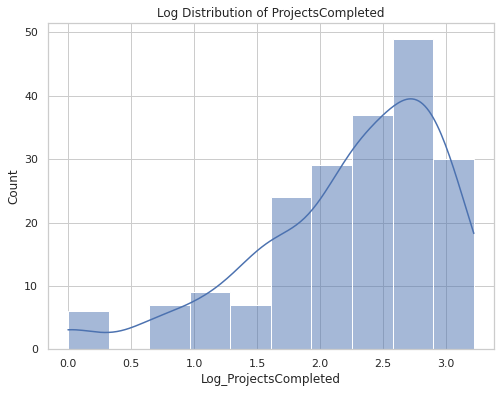

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import log

spark = SparkSession.builder.appName("LogDistributionAnalysis").getOrCreate()

df = spark.read.csv("hr_clear.csv", header=True, inferSchema=True)

log_columns = ["ProjectsCompleted"]
for column in log_columns:
    df = df.withColumn(f"log_ProjectsCompleted", log(col(column)))

log_transformed_data = df.select([f"log_ProjectsCompleted" for column in log_columns])

log_transformed_data_pandas = log_transformed_data.toPandas()

for column in log_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(log_transformed_data_pandas[f"log_ProjectsCompleted"], kde=True)
    plt.xlabel(f"Log_ProjectsCompleted")
    plt.title(f"Log Distribution of ProjectsCompleted")
    plt.show()

spark.stop()

In [ ]:
df.show(truncate=False)

In [79]:
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [80]:
train_data.describe().show()

test_data.describe().show()

+-------+------------------+
|summary| ProjectsCompleted|
+-------+------------------+
|  count|               157|
|   mean|11.388535031847134|
| stddev| 6.272293247585032|
|    min|                 0|
|    max|                25|
+-------+------------------+

+-------+-----------------+
|summary|ProjectsCompleted|
+-------+-----------------+
|  count|               43|
|   mean|11.69767441860465|
| stddev|6.957472460191992|
|    min|                0|
|    max|               24|
+-------+-----------------+



In [81]:
lr = LinearRegression(labelCol='ProjectsCompleted')

In [90]:
lrModel = lr.fit(train_data)

23/10/17 13:14:09 WARN Instrumentation: [5acf83a3] regParam is zero, which might cause numerical instability and overfitting.


In [91]:
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: [3.8803879638906866e-17,1.0000000000000002,-6.720404256324323e-18,-9.812070973557942e-19,-1.737382074966355e-16,-8.640792319157001e-20] Intercept: 3.0819273594066623e-15


In [92]:
test_results = lrModel.evaluate(test_data)

In [93]:
test_results.residuals.show()

print("RSME: {}".format(test_results.rootMeanSquaredError))

+--------------------+
|           residuals|
+--------------------+
|-5.14605218795082...|
|-6.66133814775093...|
|-8.88178419700125...|
|-4.44089209850062...|
|8.881784197001252...|
|-1.77635683940025...|
|-8.88178419700125...|
|                 0.0|
|                 0.0|
|8.881784197001252...|
|8.881784197001252...|
|-1.77635683940025...|
|-1.77635683940025...|
|-1.77635683940025...|
|                 0.0|
|-3.55271367880050...|
|8.881784197001252...|
|                 0.0|
|1.776356839400250...|
|-1.77635683940025...|
+--------------------+
only showing top 20 rows

RSME: 1.8512831881792615e-15


/home/ubuntu/spark-3.2.1-bin-hadoop2.7/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [94]:
print("R2: {}".format(test_results.r2))

R2: 1.0


In [95]:
final_data.describe().show()

+-------+-----------------+
|summary|ProjectsCompleted|
+-------+-----------------+
|  count|              200|
|   mean|           11.455|
| stddev|6.408848703826821|
|    min|                0|
|    max|               25|
+-------+-----------------+

